<a href="https://colab.research.google.com/github/SA2804/YT-channel-data-analysis/blob/main/YT_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the dependencies if it does not exist :

In [2]:
!pip install google-api-python-client

In [3]:
## import basic modules
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from getpass import getpass

API_KEY = getpass("Enter your API key: ")

Enter your API key: ··········


In [39]:
channel_ids = ["UCAuk798iHprjTtwlClkFxMA", ## Sam Sulek
              "UC6LqnOV2y-QFLK-0Aghph1A", ## Asveth Sreiram
              "UCfgrg0SXgNkZ7rTbnZCp6tg", ## Saket Gokhale
               "UCMp-0bU-PA7BNNR-zIvEydA", ## Noel Deyzel
               "UCbm8FxO0gBbZ19iydL9g3ZQ",  ## Just Merk
               "UCiWPU83VmOXjQ6xY0gIrhIQ", ## Chloe Ting
               "UCe0TLA0EsQbE-MjuHXevj2A", ## Jeff Cavaliere
               "UCzvppQwFxI_7hGFGzYz2y9Q", ## Krissy Cela
               "UCaKZDEMDdQc8t6GzFj1_TDw" ## Tibo InShape
            ]
youtube = build('youtube','v3',developerKey = API_KEY) ## creates a service by taking in 3 parameters - api_service_name,api_version and api_key

## Function to get channel statistics:

In [60]:
def get_channel_stats(youtube, channel_ids):
    allData = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = {
            'channelTitle': response['items'][i]['snippet']['title'],
            'country': response['items'][i]['snippet'].get('country', 'N/A'),
            'subscriberCount': response['items'][i]['statistics']['subscriberCount'],
            'videoCount': response['items'][i]['statistics']['videoCount'],
            'viewCount': response['items'][i]['statistics']['viewCount'],
            'playlistID':response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        }
        allData.append(data)

    return allData

channel_stats = get_channel_stats(youtube, channel_ids)
print(channel_stats)  # Print the collected data


[{'channelTitle': 'JustMerk', 'country': 'US', 'subscriberCount': '776000', 'videoCount': '208', 'viewCount': '65585732', 'playlistID': 'UUbm8FxO0gBbZ19iydL9g3ZQ'}, {'channelTitle': 'Noel Deyzel', 'country': 'ZA', 'subscriberCount': '7070000', 'videoCount': '417', 'viewCount': '3387486752', 'playlistID': 'UUMp-0bU-PA7BNNR-zIvEydA'}, {'channelTitle': 'Saket Gokhale', 'country': 'IN', 'subscriberCount': '1930000', 'videoCount': '827', 'viewCount': '258108840', 'playlistID': 'UUfgrg0SXgNkZ7rTbnZCp6tg'}, {'channelTitle': 'ATHLEAN-X™', 'country': 'US', 'subscriberCount': '14000000', 'videoCount': '1565', 'viewCount': '2592513505', 'playlistID': 'UUe0TLA0EsQbE-MjuHXevj2A'}, {'channelTitle': 'Sam Sulek', 'country': 'US', 'subscriberCount': '4040000', 'videoCount': '736', 'viewCount': '259425692', 'playlistID': 'UUAuk798iHprjTtwlClkFxMA'}, {'channelTitle': 'fabulous50s', 'country': 'US', 'subscriberCount': '1940000', 'videoCount': '713', 'viewCount': '212604679', 'playlistID': 'UUiWPU83VmOXjQ6

## Load the data into Pandas:

In [61]:
df = pd.DataFrame(channel_stats)
df

,channelTitle,country,subscriberCount,videoCount,viewCount,playlistID
0,JustMerk,US,776000,208,65585732,UUbm8FxO0gBbZ19iydL9g3ZQ
1,Noel Deyzel,ZA,7070000,417,3387486752,UUMp-0bU-PA7BNNR-zIvEydA
2,Saket Gokhale,IN,1930000,827,258108840,UUfgrg0SXgNkZ7rTbnZCp6tg
3,ATHLEAN-X™,US,14000000,1565,2592513505,UUe0TLA0EsQbE-MjuHXevj2A
4,Sam Sulek,US,4040000,736,259425692,UUAuk798iHprjTtwlClkFxMA
5,fabulous50s,US,1940000,713,212604679,UUiWPU83VmOXjQ6xY0gIrhIQ
6,Asveth Sreiram,N/A,237000,358,60154503,UU6LqnOV2y-QFLK-0Aghph1A
7,Be Inspired,RO,9100000,376,479209447,UUaKZDEMDdQc8t6GzFj1_TDw


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelTitle     8 non-null      object
 1   country          8 non-null      object
 2   subscriberCount  8 non-null      object
 3   videoCount       8 non-null      object
 4   viewCount        8 non-null      object
 5   playlistID       8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes


# Clean the data by changing the data types:




In [63]:
df['subscriberCount']=df['subscriberCount'].astype(int)
df['videoCount']=df['videoCount'].astype(int)
df['viewCount']=df['viewCount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelTitle     8 non-null      object
 1   country          8 non-null      object
 2   subscriberCount  8 non-null      int64 
 3   videoCount       8 non-null      int64 
 4   viewCount        8 non-null      int64 
 5   playlistID       8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


# Data Analysis and Visualizations:

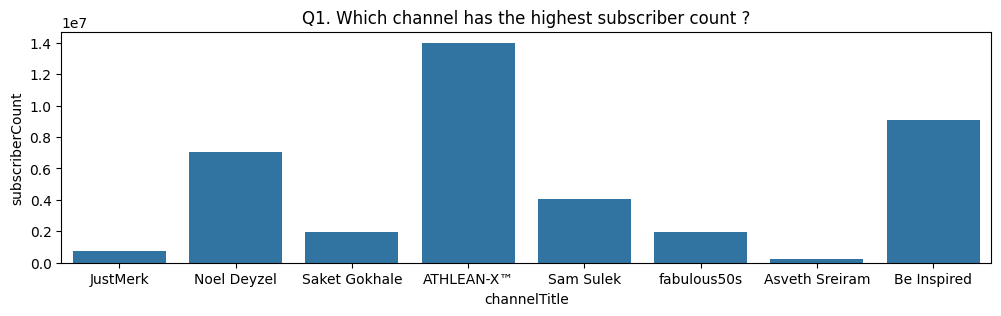

In [64]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest subscriber count ?')
sns.barplot(x='channelTitle',y='subscriberCount',data=df)

plt.show()

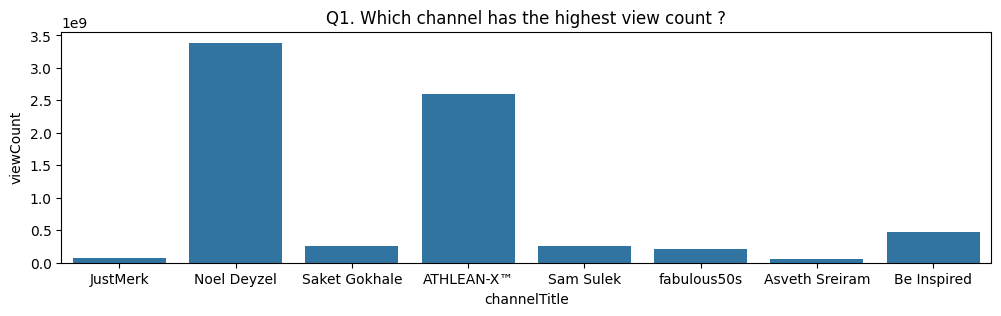

In [65]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest view count ?')
sns.barplot(x='channelTitle',y='viewCount',data=df)

plt.show()

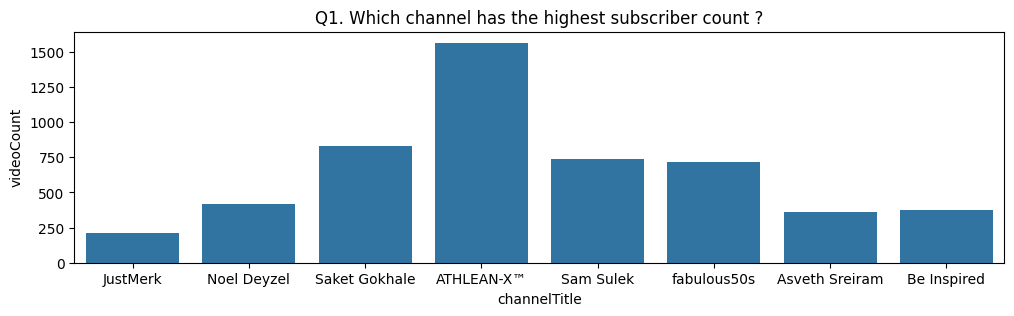

In [66]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest subscriber count ?')
sns.barplot(x='channelTitle',y='videoCount',data=df)

plt.show()

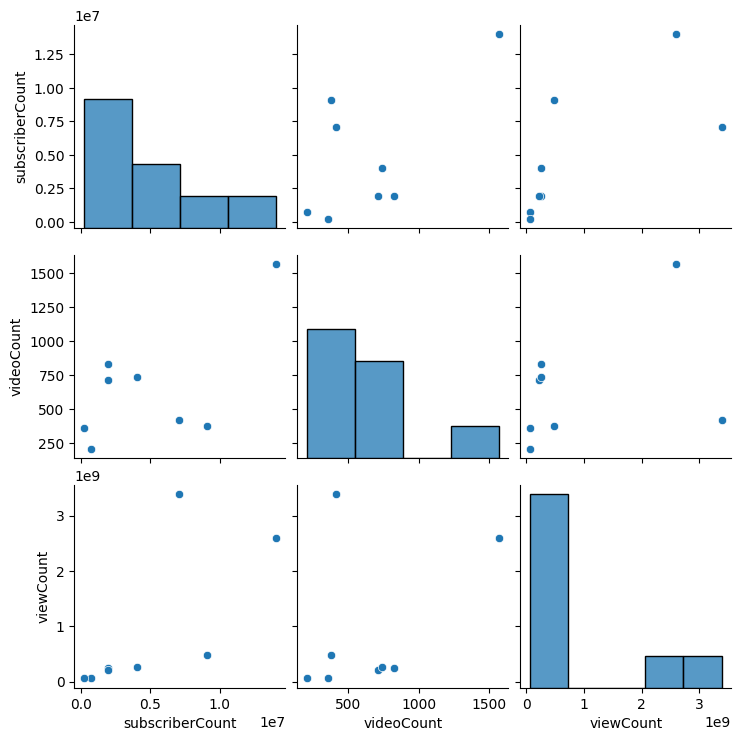

In [58]:
sns.pairplot(df)